<a href="https://colab.research.google.com/github/yousef-rezaei/Blog/blob/main/ML_KmeansUnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**
Let's first import the required libraries. Also run %matplotlib inline since we will be plotting in this section.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

**Load Data From CSV File**

Before you can work with the data, you must use the URL to get the Stud_Score.csv.

In [40]:

from google.colab import drive
drive.mount('/content/drive')
stud_df = pd.read_csv(('/content/drive/MyDrive/Stud_Score.csv'))
stud_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Stuid,mathScore,LanguageScore,gender,Physical Education
0,1,7,1,Female,13
1,2,2,9,Female,15
2,3,6,3,Female,6
3,4,15,8,Male,12
4,5,4,4,Male,5


**Pre-processing**
As you can see, Gender in this dataset is a categorical variable.The k-means algorithm, being a distance-based algorithm, is generally designed for numerical data where the notion of distance between data points makes sense. Categorical variables, such as gender with values 'female' and 'male', are not inherently suitable for k-means clustering in their raw form. This is because k-means relies on calculating distances between data points, and the concept of distance between categories is not well-defined.

However, there are ways to include categorical variables in clustering algorithms. One common approach is to convert categorical variables into numerical representations.

In [41]:
stud_df['gender'] = stud_df['gender'].replace({'Female': 0, 'Male': 1})
#save
stud_df.to_csv('modified_file.csv', index=False)
stud_df.head()

,Stuid,mathScore,LanguageScore,gender,Physical Education
0,1,7,1,0,13
1,2,2,9,0,15
2,3,6,3,0,6
3,4,15,8,1,12
4,5,4,4,1,5


Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [42]:
from sklearn.preprocessing import StandardScaler
X = stud_df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.59128113, -1.65422317, -1.02224741,  0.47608   ],
       [-1.45750018, -0.27297013, -1.02224741,  0.82472885],
       [-0.76452494, -1.30890991, -1.02224741, -0.74419096],
       ...,
       [ 0.27493793, -0.27297013,  0.97823676,  0.65040442],
       [-0.24479351,  0.07234313,  0.97823676,  0.30175558],
       [-0.07154969,  0.41765639, -1.02224741,  1.34770211]])

**Modeling**
In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each student group would have certain mathcourse, languagecourse, physical education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take look at cluster labels.

In [43]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 2 1 2 0 1 2 2 2 2 0 1 2 0 1 2 2 2 1 0 2 0 0 2 1 2 1 1 1 0 0 1 1 2 1 1
 2 1 2 1 0 0 1 1 1 2 1 0 0 0 2 1 1 0 0 2 2 1 0 0 2 2 1 2 1 2 0 1 2 0 0 1 2
 1 1 1 0 2 0 0 0 2 0 0 2 1 0 0 1 1 2 1 2 0 2 2 2 1 2 1 2 2 2 2 0 1 1 1 1 2
 0 0 2 1 0 1 1 0 1 0 0 0 2 0 0 0 1 2 2 1 0 1 0 0 2 0 1 0 0 1 0 0 1 2 2 1 0
 0 1 2 2 2 0 1 1 0 1 2 1 2 0 2 1 0 2 1 1 1 0 0 0 0 2 1 1 0 1 1 1 2 1 2 2 1
 2 1 1 2 2 1 1 2 2 2 2 1 2 0 0 1 2 2 1 2 2 1 2 1 0 1 2 0 1 0 0 2 1 0 1 0 0
 1 2 1 2 2 0 0 2 0 0 1 0 1 0 2 2 2 2 1 0 0 2 2 0 1 0 0 1 2 1 0 2 0 1 2 1 1
 0 2 2 0 2 2 1 1 1 1 2 1 2 0 1 2 0 1 1 2 1 0 1 0 2 1 2 0 1 2 1 0 1 0 1 0 0
 1 1 1 1 1 2 2 1 2 0 1 1 0 1 1 1 0 1 1 1 1 2 0 2 0 0 2 1 2 0 0 2 1 0 2 1 0
 0 2 2 1 2 0 2 0 0 2 1 2 0 2 1 0 0 0 2 0 2 0 0 0 1 1 2 2 2 0 2 1 1 0 1 0 2
 1 2 0 0 2 0 1 1 2 2 0 2 1 1 0 2 0 2 2 1 2 2 1 0 0 0 0 0 1 2 2 2 0 2 2 2 1
 0 1 0 1 1 0 2 2 0 2 1 2 2 0 0 0 0 2 2 1 2 2 1 2 1 2 1 1 2 1 0 0 1 2 2 0 1
 2 0 1 1 2 0 2 2 1 1 2 2 2 1 2 2 1 1 0 0 2 1 0 1 1 0 0 1 0 2 2 0 0 2 2 0 0
 1 2 0 1 2 1 0 1 2 0 2 0 

**Insights**
We assign the labels to each row in dataframe.

In [44]:
stud_df["Clus_km"] = labels
stud_df.head(5)

,Stuid,mathScore,LanguageScore,gender,Physical Education,Clus_km
0,1,7,1,0,13,0
1,2,2,9,0,15,0
2,3,6,3,0,6,2
3,4,15,8,1,12,1
4,5,4,4,1,5,2


We can easily check the centroid values by averaging the features in each cluster.

In [45]:
stud_df.groupby('Clus_km').mean()

,Stuid,mathScore,LanguageScore,gender,Physical Education
Clus_km,,,,,
0,520.180516,10.126074,10.000000,0.484241,16.661891
1,481.753894,16.080997,10.769470,0.510903,6.853583
2,497.921212,5.203030,11.012121,0.539394,6.830303


Now, let's look at the distribution of Students based on their mathScore and pysical education:

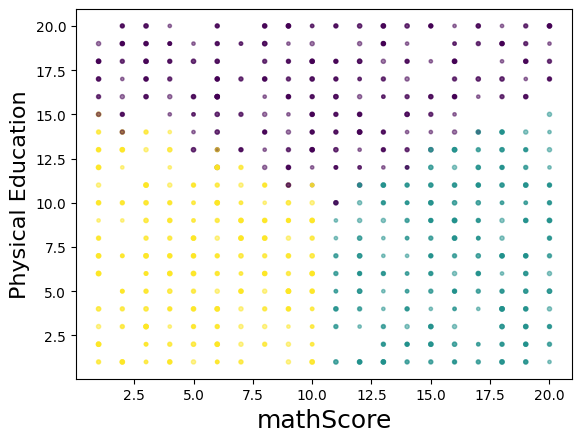

In [48]:
area = (np.pi * ( X[:, 2])**6)+6
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('mathScore', fontsize=18)
plt.ylabel('Physical Education', fontsize=16)
plt.show()